In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np
import hvplot.pandas
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

<div> 
<h3 style="font-size: 22px; font-weight: bold; color: #FF5733 ; margin-bottom: 10px;"> Understanding the Raw Dataset </h3>
    
</div>
**Columns**

1. State: Stores someone's geographic information. 

2. Sex: Indicates someone's gender. 

3. GeneralHealth: Describes someone's overall health condition. 

4. PhysicalHealthDays: Describes someone's physical health condition.

5. MentalHealthDays: Indicates someone's mental health condition. 

6. LastCheckupTime: Contains the information of the last health check 

7. PhysicalActivities: Indicates how active someone is in physical activities.

8. SleepHours: Someone's sleep time, which could be an indicator of sleep health. 

9. RemovedTeeth: Contains information about whether someone has removed teeth or not.

10. HadHeartAttack: This column stores information about whether someone has heart disease or not. 

11. HadAngina: This column stores information about whether someone has angina (A type of chest pain caused by reduced blood flow to the heart) or not.

12. HadStroke: Contains information about whether someone has had a stroke or not. 

13. HadAsthma: Stores information about whether someone has asthma or not.

14. HadSkinCancer: Stores information about whether someone has skin cancer or not. 

15. HadCOPD: Stores information about whether someone has COPD (Symptoms include cough, sometimes with phlegm, difficulty breathing) or not

16. HadDepressiveDisorder: Stores information about whether someone has depressive disorder or not 

17. HadKidneyDisease: Contains information about whether someone has kidney disease or not. 

18. HadArthritis: Contains information about whether someone has arthritis (inflammation or swelling of one or more joints) or not

19. HadDiabetes: Stores information about whether someone has diabetes or not. 

20. DeafOrHardOfHearing: Stores information about whether someone has difficulty hearing or not.

21. BlindOrVisionDifficulty: Stores information about whether someone has difficulty in vision or not.

22. DifficultyConcentrating: Stores information about whether someone has difficulty concentrating or not. 

23. DifficultyWalking: Stores information about whether someone has difficulty walking or not.

24. DifficultyDressingBathing: Stores information about whether someone has difficulty dressing/bathing or not. 

25. DifficultyErrands: Stores information about whether someone has difficulty errands or not.

26. SmokerStatus: Stores information about whether someone smokes or not.

27. ECigaretteUsage: Stores information about whether someone use electronic cigarette or not. 

28. ChestScan: Stores information about whether someone had chest scanned or not.

29. RaceEthnicityCategory: Stores information about someone's race or ethnicity. 

30. AgeCategory: Groups someone's age into specific categories.

31. HeightInMeters: Stores someone's height information (in meters).

32. WeightInKilograms: Stores someone's weight information (in kilograms).

33. BMI: Stands for Body Mass Index, which measures the proportion of weight to height for an individual. 

34. AlcoholDrinkers: Information about whether someone consumes alcohol or not.

35. HIVTesting: Stores information about whether someone had HIV testing or not. 

36. FluVaxLast12: Stores information about whether someone had flu vacination in the last 12 months or not.  

37. PneumoVaxEver: Stores information about whether someone ever had Pneumo Vaccination or not.  

38. TetanusLast10Tdap: Stores information about whether someone ever had Tdap Vaccination or not. 

39. HighRiskLastYear: Stores information about whether someone was in high risk or not. 

40. CovidPos: Stores information about whether someone had Covid or not. 

# 1. Loading the Dataset from CSV

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv("heart_2022_with_nans.csv")
# Display sample data
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


# 2. Exploring the Dataset

In [3]:
# Find the duplicated values
df.duplicated().sum()

# Drop duplicated values
df.drop_duplicates(inplace=True)

# Check again information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444975 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      444975 non-null  object 
 1   Sex                        444975 non-null  object 
 2   GeneralHealth              443782 non-null  object 
 3   PhysicalHealthDays         434053 non-null  float64
 4   MentalHealthDays           435913 non-null  float64
 5   LastCheckupTime            436674 non-null  object 
 6   PhysicalActivities         443887 non-null  object 
 7   SleepHours                 439527 non-null  float64
 8   RemovedTeeth               433620 non-null  object 
 9   HadHeartAttack             441915 non-null  object 
 10  HadAngina                  440575 non-null  object 
 11  HadStroke                  443423 non-null  object 
 12  HadAsthma                  443207 non-null  object 
 13  HadSkinCancer              441837 

In [4]:
# Remove the missing values
df1 = df.dropna()

# Check again the missing values
df1.isna().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

<Axes: >

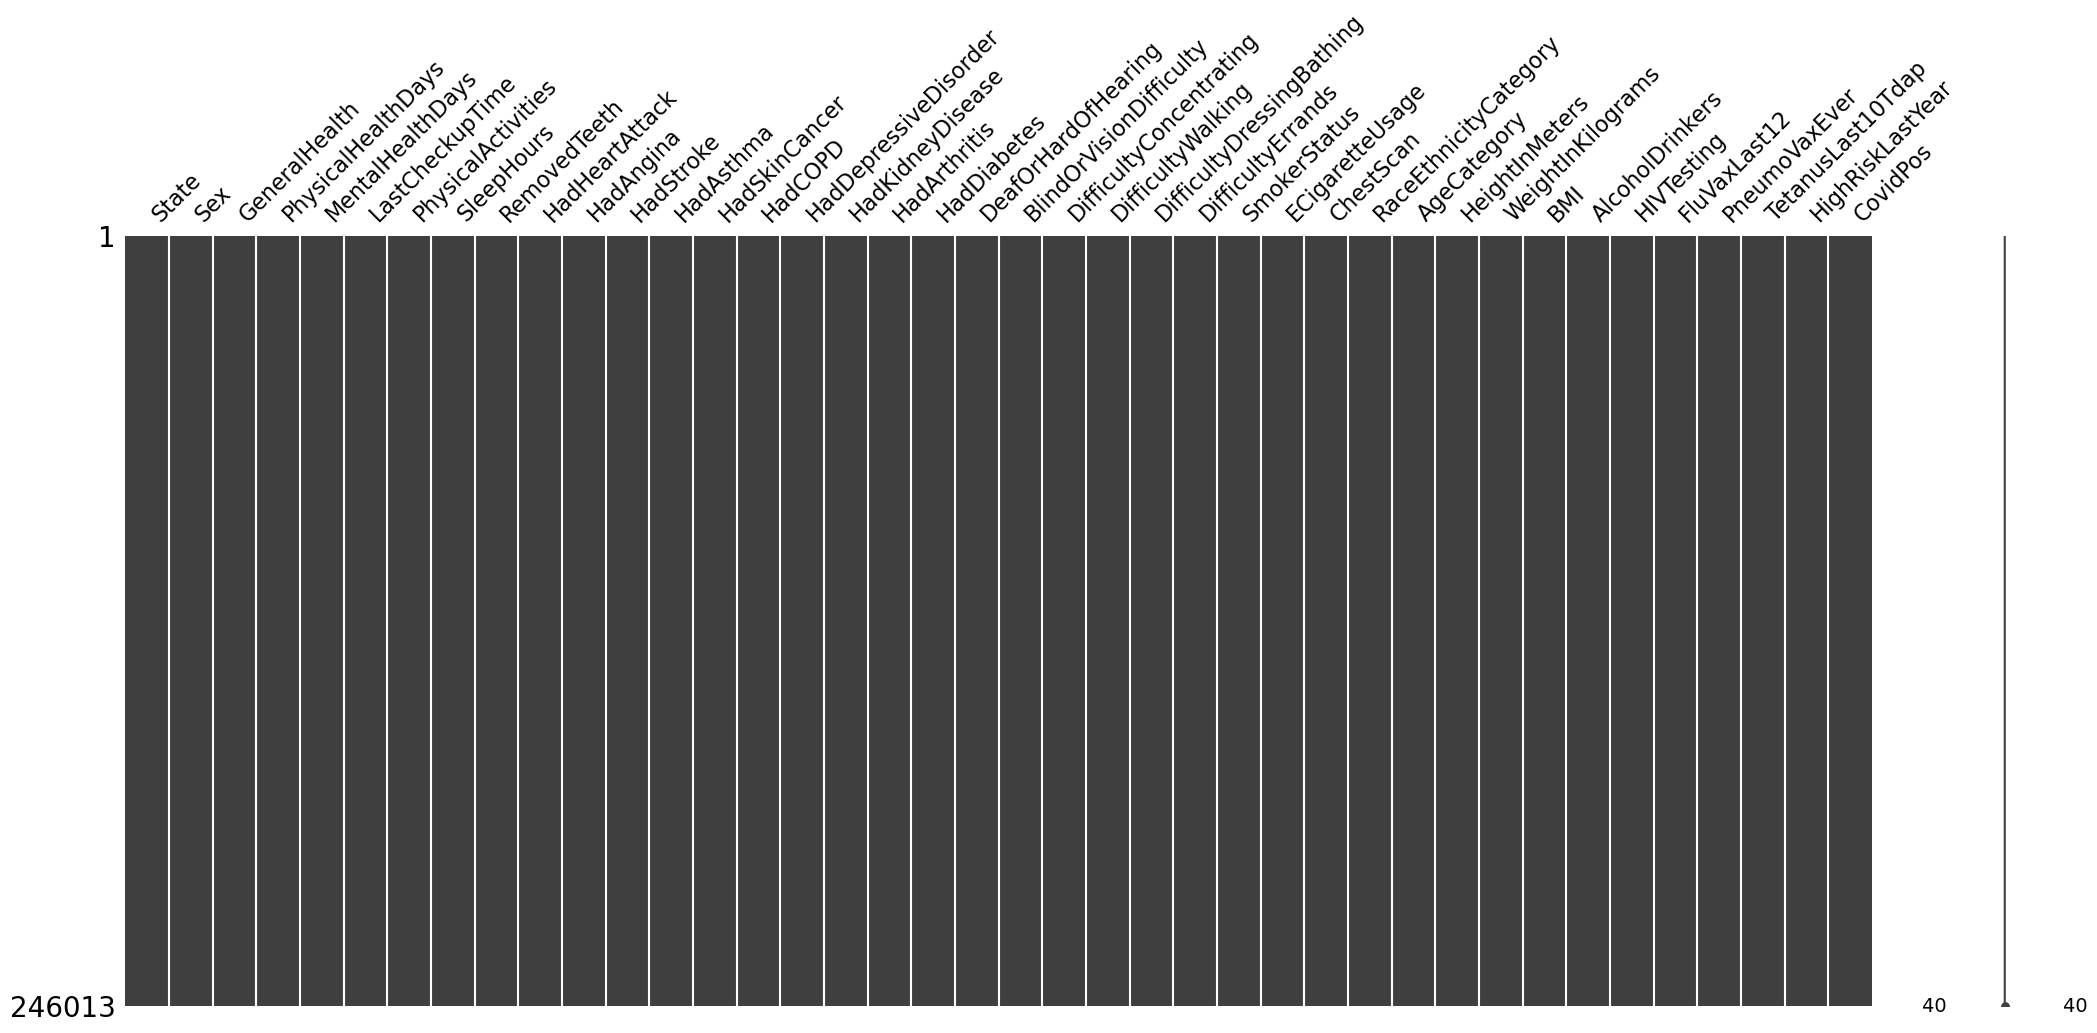

In [5]:
# Check he missing data
msno.matrix(df1)

In [6]:

# Statistical Analysis for numerical data in dataset
df1.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000,246013.000000
mean,4.119055,4.167292,7.021312,1.705150,83.615522,28.668258
std,8.405803,8.102796,1.440698,0.106654,21.323232,6.514005
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [21]:
# Find object/category columns
cat_cols= df1.select_dtypes(include=["object", "category"]).columns.tolist()
cat_cols

['State',
 'Sex',
 'Age',
 'Race',
 'GenHealth',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Smoking',
 'ECigaretteUsage',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease',
 'Diabetes']

# 4. Data Processing

### 4.1. Convert Categorical Variables to Numerical Variables

In [42]:
# Identify binary columns
# The condition checks if the column has exactly 2 unique values using the nunique() 
binary_cols = [col for col in df1.columns if df1[col].nunique() == 2]
binary_cols

['Sex',
 'PhysicalActivity',
 'ChestScan',
 'DiffWalking',
 'Drinking',
 'HeartAttack',
 'Angina',
 'Stroke',
 'Asthma',
 'SkinCancer',
 'Depressed',
 'KidneyDisease']

In [43]:
# Copy df1 to df2
df2 = df1.copy()

# Then, drop column named "State"
df2 = df2.drop("State", axis=1)

In [44]:
# Convert and verify binary columns
all_binary = True

for col in binary_cols:
    unique_values = df2[col].unique()
    if set(unique_values) != {0, 1}:
        mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df2[col] = df2[col].map(mapping)
    
    # Verify conversion
    if set(df2[col].unique()) != {0, 1}:
        all_binary = False
        print(f"Column {col} has non-binary values: {set(df2[col].unique())}")

if all_binary:
    print("All binary columns have been successfully converted to 0 and 1.")
else:
    print("Some columns still have non-binary values.")

All binary columns have been successfully converted to 0 and 1.


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318925 entries, 1 to 445131
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318925 non-null  int64  
 1   Age               318925 non-null  object 
 2   Race              318925 non-null  object 
 3   BMI               318925 non-null  float64
 4   GenHealth         318925 non-null  object 
 5   PhysicalHealth    318925 non-null  float64
 6   MentalHealth      318925 non-null  float64
 7   PhysicalActivity  318925 non-null  int64  
 8   ChestScan         318925 non-null  int64  
 9   SleepHours        318925 non-null  float64
 10  DiffWalking       318925 non-null  int64  
 11  Smoking           318925 non-null  object 
 12  ECigaretteUsage   318925 non-null  object 
 13  Drinking          318925 non-null  int64  
 14  HeartAttack       318925 non-null  int64  
 15  Angina            318925 non-null  int64  
 16  Stroke            318925 

In [46]:
# Encoding "object" type variables

# Age 
age_mapping = {
    '18-24': 0, 
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}
df2["Age"] = df2["Age"].replace(age_mapping).astype(int)

# Race
race_mapping = {
    'White': 0, 
    'Black': 1,
    'Other': 2, 
    'Multiracial': 3, 
    'Hispanic': 4
}
df2["Race"] = df2["Race"].replace(race_mapping).astype(int)

# GenHealth
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df2["GenHealth"] = df2["GenHealth"].replace(genhealth_mapping).astype(int)

# Smoking
smoking_mapping = {
    'Never smoked': 0,
    'Former smoker': 1,
    'Current smoker - now smokes some days': 2,
    'Current smoker - now smokes every day': 3
}
df2["Smoking"] = df2["Smoking"].replace(smoking_mapping).astype(int)

# ECigaretteUsage
ec_mapping = {
    'Never used e-cigarettes in my entire life': 0,
    'Not at all (right now)': 1,
    'Use them every day': 2,
    'Use them some days': 3
}
df2["ECigaretteUsage"] = df2["ECigaretteUsage"].replace(ec_mapping).astype(int)

# Diabetic 
diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 3,
    'Yes, during pregnancy': 4
}
df2["Diabetes"] = df2["Diabetes"].replace(diabetic_mapping).astype(int)

In [47]:
# Check columns' type again
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 318925 entries, 1 to 445131
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sex               318925 non-null  int64  
 1   Age               318925 non-null  int64  
 2   Race              318925 non-null  int64  
 3   BMI               318925 non-null  float64
 4   GenHealth         318925 non-null  int64  
 5   PhysicalHealth    318925 non-null  float64
 6   MentalHealth      318925 non-null  float64
 7   PhysicalActivity  318925 non-null  int64  
 8   ChestScan         318925 non-null  int64  
 9   SleepHours        318925 non-null  float64
 10  DiffWalking       318925 non-null  int64  
 11  Smoking           318925 non-null  int64  
 12  ECigaretteUsage   318925 non-null  int64  
 13  Drinking          318925 non-null  int64  
 14  HeartAttack       318925 non-null  int64  
 15  Angina            318925 non-null  int64  
 16  Stroke            318925 

### 4.2. Correlation Matrix

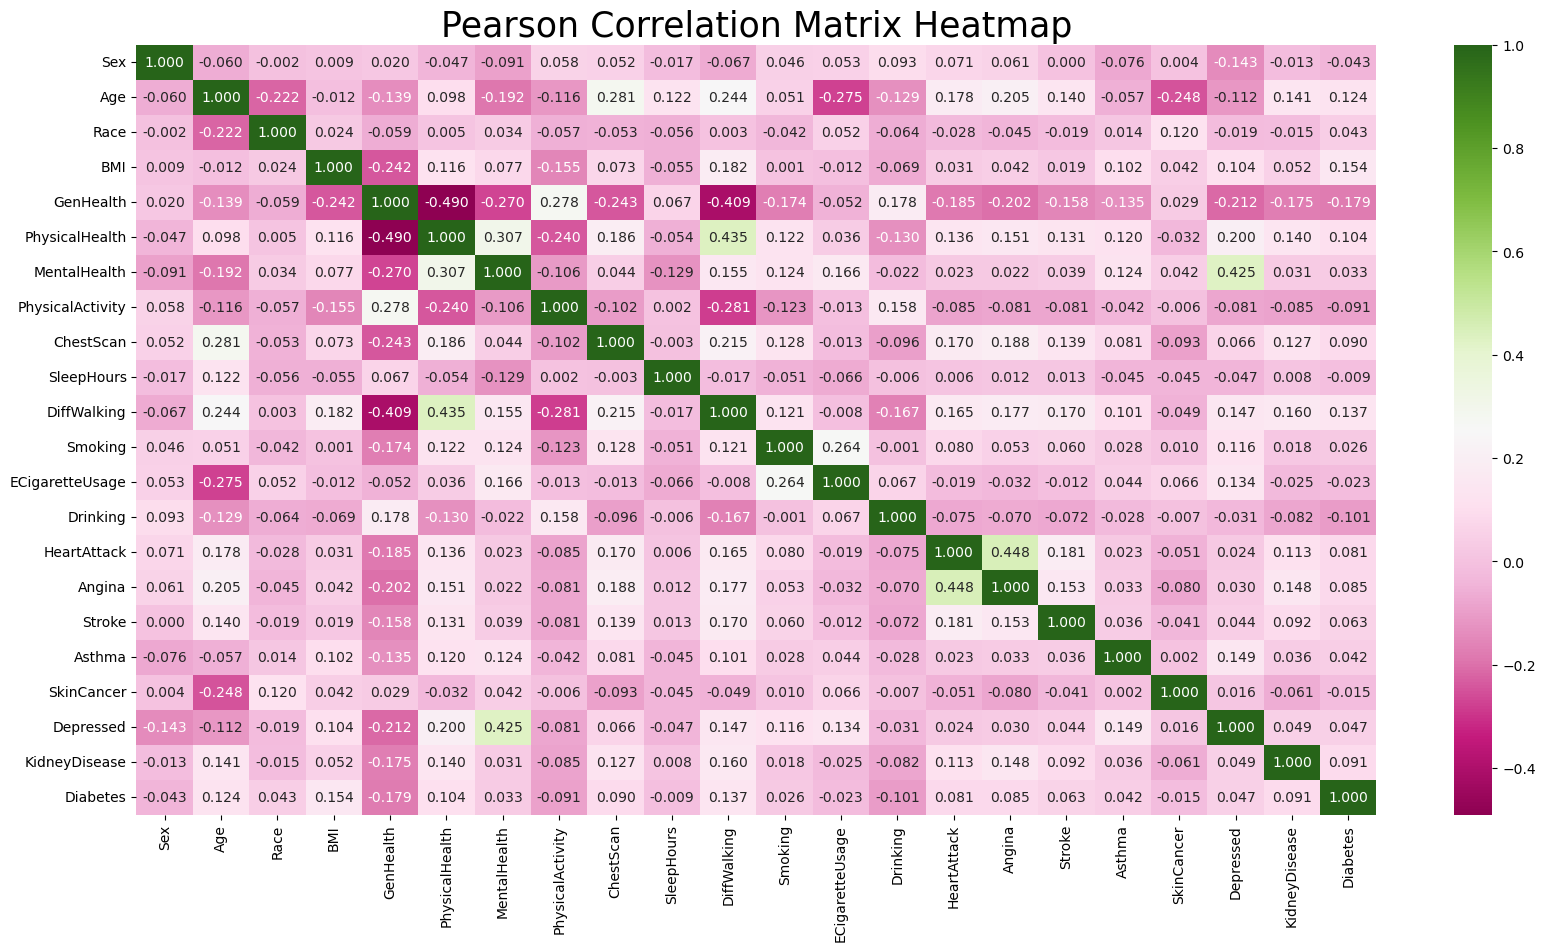

In [48]:
# Plot the Heatmap of correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), cmap= 'PiYG', fmt='.3f', annot=True)
plt.yticks(rotation=0)
plt.title("Pearson Correlation Matrix Heatmap", fontsize=25)
plt.show()

# 5. Machine Learning

### 5.1. Linear Regression Model
##### 5.1.1 Building Model

In [8]:
# Copy dataset for Machine Learning
df2 = df1.copy()

In [9]:
df2

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
342,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
343,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
345,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
346,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
347,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445117,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
445123,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
445124,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
445128,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


In [11]:
# Split the data into feature (X) and target variable (y)
X = df2.drop("HadHeartAttack", axis=1)
y = df2["HadHeartAttack"]

In [12]:
# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

##### 5.1.2. Create a Logistic Regression Model with the Original Data

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
model = LogisticRegression(solver='lbfgs', max_iter=200, random_state=78)

# Fit the model using training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Ohio'

In [57]:
# Make a prediction using the testing data

# Make a prediction using the X_test
y_prediction = model.predict(X_test)

# Create a DataFrame for the predicted y values
df_y_prediction = pd.DataFrame({"y_test": y_test, "prediction": y_prediction})
df_y_prediction.sample(10)

,y_test,prediction
205817,0,0
143835,0,0
440964,0,0
149830,0,0
36933,0,0
416690,0,0
352671,0,0
13863,0,0
238902,0,0
103311,0,0


##### 5.1.3. Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [58]:
# Generate a confusion matrix for the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_prediction))

Confusion Matrix:
[[74635   860]
 [ 3144  1093]]


In [54]:
# Print the classification report for the model

# Set the target variable labels
target_label_names = ["No (0)", "Yes (1)"]

# Print the classification report for the model
print("The classification report for the model:")
print(classification_report(y_test, y_prediction, target_names=target_label_names))

The classification report for the model:
              precision    recall  f1-score   support

      No (0)       0.96      0.99      0.97     75495
     Yes (1)       0.56      0.26      0.35      4237

    accuracy                           0.95     79732
   macro avg       0.76      0.62      0.66     79732
weighted avg       0.94      0.95      0.94     79732



**Question:** How well does the logistic regression model predict both the `0` (No Heart Attack) and `1` (Had Heart Attack) labels?

**Answer:** When compared to the original dataset, there are more 'No' than 'Yes'. Even though, the model demonstrates a high accuracy of 95%. The precision score for 'No' is 96%, while the precision for 'Yes' is extremely low with 56%. Additionally, the recall score is 99% for predicting 'No' labels, but 26% for high-risk 'Yes'.

### 5.2. Deep Learning - Standard Scaler Module

In [14]:
# Copy dataset for Machine Learning
df3 = df1.copy()

In [15]:
# Determine the number of unique values in each column by using 'nunique()'.
print(df3.nunique())

State                          54
Sex                             2
GeneralHealth                   5
PhysicalHealthDays             31
MentalHealthDays               31
LastCheckupTime                 4
PhysicalActivities              2
SleepHours                     23
RemovedTeeth                    4
HadHeartAttack                  2
HadAngina                       2
HadStroke                       2
HadAsthma                       2
HadSkinCancer                   2
HadCOPD                         2
HadDepressiveDisorder           2
HadKidneyDisease                2
HadArthritis                    2
HadDiabetes                     4
DeafOrHardOfHearing             2
BlindOrVisionDifficulty         2
DifficultyConcentrating         2
DifficultyWalking               2
DifficultyDressingBathing       2
DifficultyErrands               2
SmokerStatus                    4
ECigaretteUsage                 4
ChestScan                       2
RaceEthnicityCategory           5
AgeCategory   

In [16]:
# Look at BMI value counts to identify and replace with "Other"
bmi_counts = df3["BMI"].value_counts()
bmi_counts

BMI
26.63    2727
27.46    2040
27.44    1963
24.41    1922
27.12    1893
         ... 
41.65       1
33.24       1
25.57       1
13.64       1
45.28       1
Name: count, Length: 3514, dtype: int64

In [18]:
# Choose a cutoff value (i.e., 500) and create a list of bmi to be replaced
# use the variable name `bmi_to_replace`
bmi_to_replace = list(bmi_counts[bmi_counts < 150].index)
#bmi_to_replace
# Replace in dataframe
for bmi in bmi_to_replace:
    df3['BMI'] = df3['BMI'].replace(bmi,"Other")

# Check to make sure replacement was successful
df3['BMI'].value_counts()

BMI
Other    65975
26.63     2727
27.46     2040
27.44     1963
24.41     1922
         ...  
26.83      152
28.84      151
30.3       151
39.05      150
38.62      150
Name: count, Length: 375, dtype: int64

In [21]:
# Convert categorical data to numeric with `pd.get_dummies`
num_df3 = pd.get_dummies(df3)
num_df3.head()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,...,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_No,HighRiskLastYear_Yes,CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,4.0,0.0,9.0,1.60,71.67,True,False,False,False,False,...,True,False,True,False,False,True,False,True,False,False
343,0.0,0.0,6.0,1.78,95.25,True,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
345,0.0,0.0,8.0,1.85,108.86,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
346,5.0,0.0,9.0,1.70,90.72,True,False,False,False,False,...,True,True,False,False,False,True,False,False,False,True
347,3.0,15.0,5.0,1.55,79.38,True,False,False,False,False,...,True,True,False,False,False,True,False,True,False,False


In [24]:
num_df3.columns

Index(['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours',
       'HeightInMeters', 'WeightInKilograms', 'State_Alabama', 'State_Alaska',
       'State_Arizona', 'State_Arkansas', 'State_California',
       ...
       'PneumoVaxEver_Yes',
       'TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years',
       'TetanusLast10Tdap_Yes, received Tdap',
       'TetanusLast10Tdap_Yes, received tetanus shot but not sure what type',
       'TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap',
       'HighRiskLastYear_No', 'HighRiskLastYear_Yes', 'CovidPos_No',
       'CovidPos_Tested positive using home test without a health professional',
       'CovidPos_Yes'],
      dtype='object', length=530)

In [25]:
X = num_df3.drop("HadHeartAttack_Yes", axis=1).values
y = num_df3["HadHeartAttack_Yes"].values

In [26]:
# # Split our preprocessed data into our features and target arrays
# y = num_df4["HeartAttack"].values
# X = num_df4.drop(columns="HeartAttack").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [27]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model

In [28]:
import tensorflow as tf

# Define the model - deep learning neural network, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]

nn_model = tf.keras.models.Sequential()

# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="relu"))

# Third hidden layer
nn_model.add(tf.keras.layers.Dense(units=80, activation="tanh"))


# Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │        42,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │         6,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,441 (216.57 KB)

 Trainable params: 55,441 (216.57 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Compile the model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 4s 544us/step - accuracy: 0.9935 - loss: 0.0217
Epoch 2/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 541us/step - accuracy: 0.9999 - loss: 4.8567e-04
Epoch 3/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 514us/step - accuracy: 1.0000 - loss: 7.3950e-06
Epoch 4/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 516us/step - accuracy: 1.0000 - loss: 1.1893e-04
Epoch 5/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 530us/step - accuracy: 1.0000 - loss: 9.4296e-07
Epoch 6/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 577us/step - accuracy: 1.0000 - loss: 5.7968e-08
Epoch 7/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 554us/step - accuracy: 1.0000 - loss: 3.8707e-09
Epoch 8/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 599us/step - accuracy: 1.0000 - loss: 5.2867e-10
Epoch 9/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 528us/step - accuracy: 1.0000 - loss: 1.9631e-10
Epoch 10/10
5766/5766 ━━━━━━━━━━━━━━━━━━━━ 3s 536us/step - accuracy: 1.0000 - loss: 1.1841e-10


In [66]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2492/2492 - 1s - 375us/step - accuracy: 0.9472 - loss: 0.1532
Loss: 0.15323200821876526, Accuracy: 0.9472106695175171
